## Introduction

This step focuses on collecting the data, organizing it, and making sure it's well defined. 

The data comes from a large number of Wikipedia comments which have been labeled by human raters for toxic behavior. The types of toxicity are:
* `toxic`
* `severe_toxic`
* `obscene`
* `threat`
* `insult`
* `identity_hate`

### Objective

Create a model which predicts a probability of each type of toxicity for each comment.

### Import Libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import matplotlib as mpl

mpl.style.use("seaborn")
# mpl.rcParams["figure.dpi"] = 100

### Data Collection

Goal: Organize data to streamline the next steps.

In [2]:
raw_train_data = pd.read_csv("../data/train.csv")
raw_train_data.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
36357,611f7984afa841b7,"Don't be rude i did nothing disruptive , as ...",0,0,0,0,0,0
42094,704e8487c6a316d4,"""\nWhat do you mean by """"pro-Georgian""""? Just ...",0,0,0,0,0,0
155495,bec805664f99818c,"thanks, but no thanks. i don't have time like ...",1,0,0,0,0,0
114813,65fb27669c03c8c3,"""\nWhat I may or may not know is not the issue...",0,0,0,0,0,0
129115,b2871783c8b1e25d,"""\n\nYeah, you've got a bit of a point there. ...",0,0,0,0,0,0


### Data Definition

Goal: Gain an understanding of the data features

In [3]:
# Here is an example of a comment
raw_train_data['comment_text'][random.randint(0, raw_train_data.shape[0])]

"A translation is better than nothing at all. I'm sure other arabic Wikipedians can proofread your translation and improve it if needed. |Talk 11:21, 30 Sept, 2006 (UTC)"

Identify column names that will be used for prediction

In [4]:
# Create a list of labels to predict
labels_to_predict = list(raw_train_data.columns[2:])
print(labels_to_predict)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


Explore what are the data types for each column of the dataset

In [5]:
# call info to see a summary of the data
raw_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


Only the column`comment_text`is not numerical, the rest of columns are integers. We will have to change from integers to floats to predict the probability of each type.

In [6]:
comments_len = raw_train_data['comment_text'].str.len()

Unique values for each column

In [7]:
for label in labels_to_predict:
    print(raw_train_data[label].value_counts())
    print("\n")

0    144277
1     15294
Name: toxic, dtype: int64


0    157976
1      1595
Name: severe_toxic, dtype: int64


0    151122
1      8449
Name: obscene, dtype: int64


0    159093
1       478
Name: threat, dtype: int64


0    151694
1      7877
Name: insult, dtype: int64


0    158166
1      1405
Name: identity_hate, dtype: int64




### Summary Statistics

Visualize the distribution of characters on each comment.

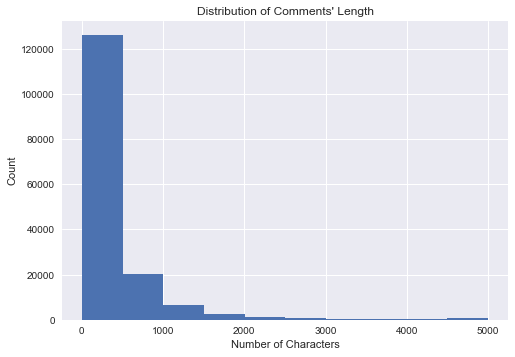

In [8]:
plt.hist(comments_len)
plt.title("Distribution of Comments' Length")
plt.xlabel("Number of Characters")
plt.ylabel("Count")
plt.show()

Descriptive statistics of the comments' length

In [9]:
print(comments_len.describe())

count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: comment_text, dtype: float64


We can see that most of the comments have between `0 - 1000` characters. These include characters that are not letters.

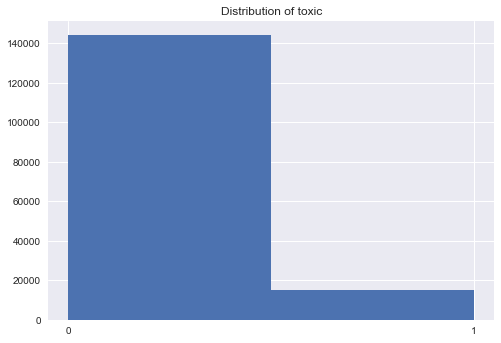

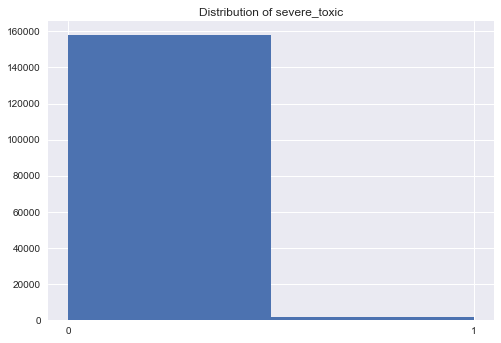

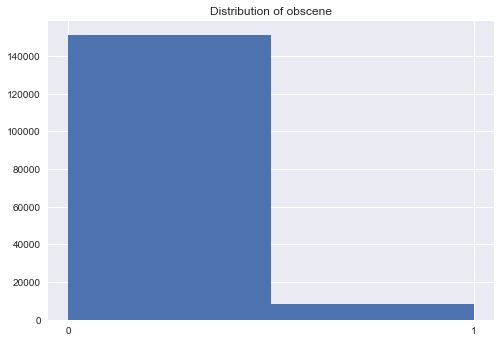

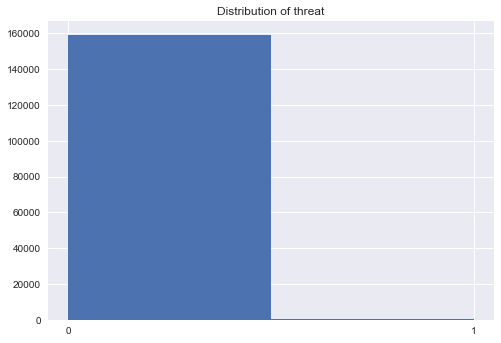

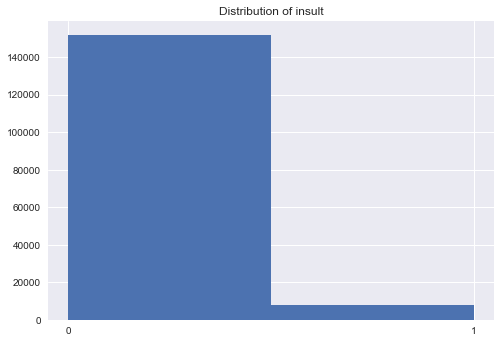

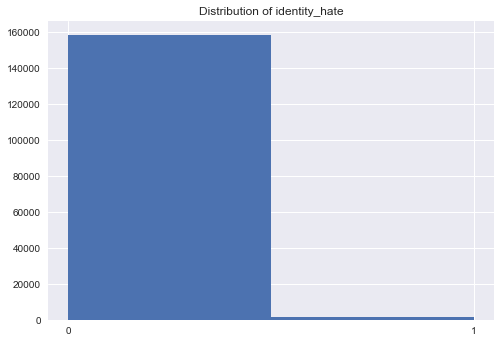

In [11]:
def plot_distributions(label):
    plt.clf()
    plt.hist(raw_train_data[label], bins=2)
    plt.title("Distribution of {}".format(label))
    plt.xticks([0, 1])
    plt.show()
    
for label in labels_to_predict:
    plot_distributions(label)
